In [92]:
# dataframes
import pandas as pd
from numpy.random import rand, randn, beta
from numpy import sin
import math

# plotting
import matplotlib.pyplot as plt
import seaborn

# linear regression two ways
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# for choosing covariates to include in model
from patsy import dmatrices 

# test mutual independence

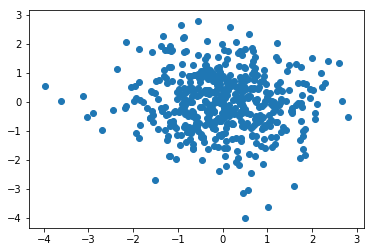

In [60]:
##  these errors are mutually independent 

# generate data
n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid

plt.scatter(resid[:-1], resid[1:])

In [61]:
def indep_resid(n=500):
    eps = randn(n) # independent normal(0,1)
    x   = 10*rand(n) # uniform(0,10)
    y   = x + eps

    # form and fit model
    model = sm.OLS(y, x).fit()
    return x,y,model.resid

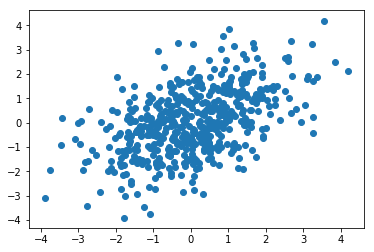

In [62]:
##  these errors are NOT mutually independent 

# generate data
n   = 500   # number of observations
a   = 1     # use this to control the correlation
w   = randn(n+1) # independent normal(0,1)
eps = w[:-1] + a*w[1:] # normal, not independent
x   = 10*rand(n) # uniform(0,10)
y   = x + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid

plt.scatter(resid[:-1], resid[1:])

In [63]:
def dep_resid(n=500, a=1):
    w   = randn(n+1) # independent normal(0,1)
    eps = w[:-1] + a*w[1:] # normal, not independent
    x   = 10*rand(n) # uniform(0,10)
    y   = x + eps

    # form and fit model
    model = sm.OLS(y, x).fit()
    return x,y,model.resid

# test mutual independence by plotting autocorrelations

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.0322414 , -0.03618296,  0.00511978,  0.00709442,  0.0283659 ,
         0.03727395, -0.04781382, -0.04662113,  0.02230651, -0.06100464,
         1.        , -0.06100464,  0.02230651, -0.04662113, -0.04781382,
         0.03727395,  0.0283659 ,  0.00709442,  0.00511978, -0.03618296,
         0.0322414 ]),
 <matplotlib.lines.Line2D at 0x1c291c9320>)

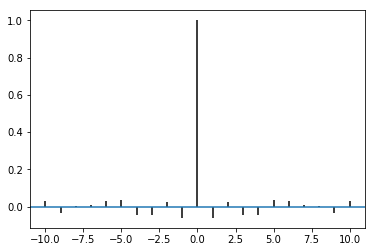

In [64]:
x,y,resid = indep_resid()
plt.acorr(resid)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.02988173, -0.02616411, -0.03546047, -0.00236163,  0.03075538,
         0.00821953, -0.05237887, -0.066299  , -0.02163475,  0.50073724,
         1.        ,  0.50073724, -0.02163475, -0.066299  , -0.05237887,
         0.00821953,  0.03075538, -0.00236163, -0.03546047, -0.02616411,
        -0.02988173]),
 <matplotlib.lines.Line2D at 0x1c29379f60>)

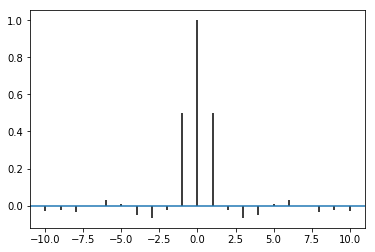

In [65]:
x,y,resid = dep_resid()
plt.acorr(resid)

# test linearity (equivalently, independence of residuals and covariates)

In [66]:
# example: y is linear in x

n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid
yhat = model.predict()

Text(0, 0.5, 'residual')

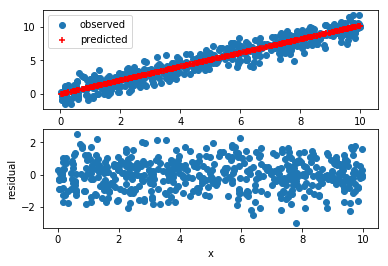

In [67]:
# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence - notice no relation between x and residual
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")


In [68]:
# example: y is not linear in x

n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + x**2 + eps

# form and fit model
model = sm.OLS(y, x).fit()
resid = model.resid
yhat = model.predict()

Text(0, 0.5, 'residual')

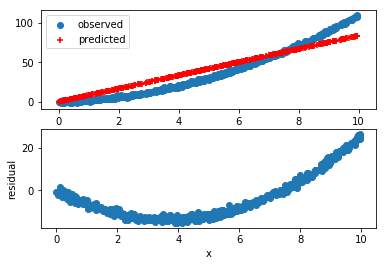

In [69]:
# visually test for nonlinearity - predictions are bad, and residuals are not independent of input variable

# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence  - notice quadratic relation between x and residual!
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")

In [83]:
# example: y is not linear in x
# fix the problem by fitting a more sophisticated model

n   = 500 # number of observations
eps = randn(n) # independent normal(0,1)
x   = 10*rand(n) # uniform(0,10)
y   = x + x**2 + eps

# form and fit model
df = pd.DataFrame()
df['x'] = x
df['xsq'] = x**2
model = sm.OLS(y, df).fit()

resid = model.resid
yhat = model.predict()

Text(0, 0.5, 'residual')

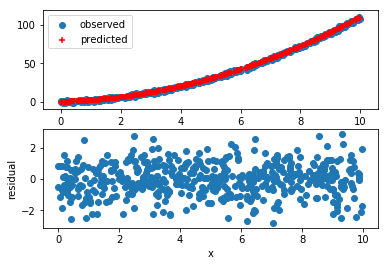

In [84]:
# now visually test for nonlinearity - it's gone, and predictions are good!

# plot input variable vs predictions and observations
plt.subplot(2,1,1) # make a 2 x 1 grid of plots; access the first plot
p = plt.scatter(x,y,marker='o',label="observed")
plt.scatter(x,yhat,marker="+",color="red",label="predicted")
plt.legend()

# plot input variable vs residual to test for independence  - notice quadratic relation between x and residual!
plt.subplot(2,1,2) # now access the second plot
plt.scatter(x,resid)
plt.xlabel("x")
plt.ylabel("residual")

## residuals are better than raw data for assessing nonlinearity

In [100]:
n = 200
x1 = beta(2,2,n)
x2 = randn(n)
y = sin(2*math.pi*x1) + 2*x2 + .23*randn(n)